In [ ]:
from google.colab import drive

drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

import numpy as np


df1 = pd.read_csv('/content/drive/MyDrive/optdigits_train.txt')

df2 = pd.read_csv('/content/drive/MyDrive/optdigits_test.txt')


In [ ]:
print(df1)

      0  0.1   5  13   9   1  0.2  0.3  0.4  0.5  ...  0.23  0.24  0.25   6  \
0     0    0   0  12  13   5    0    0    0    0  ...     0     0     0   0   
1     0    0   0   4  15  12    0    0    0    0  ...     0     0     0   0   
2     0    0   7  15  13   1    0    0    0    8  ...     0     0     0   7   
3     0    0   0   1  11   0    0    0    0    0  ...     0     0     0   0   
4     0    0  12  10   0   0    0    0    0    0  ...     0     0     0   9   
...  ..  ...  ..  ..  ..  ..  ...  ...  ...  ...  ...   ...   ...   ...  ..   
1494  0    0   0   0   6  16    7    0    0    1  ...     0     0     0   0   
1495  0    0   2  13  16   9    0    0    0    0  ...     0     0     0   1   
1496  0    0   0  14   4   0    0    0    0    0  ...     0     0     0   1   
1497  0    1   9  15  13   4    0    0    0    5  ...     0     0     0   8   
1498  0    5  16  13   1   0    0    0    0    9  ...     0     0     5  16   

      13.2  10.2  0.26  0.27  0.28  0.29  
0       

In [ ]:
print(df2)

     0  0.1  0.2   3  12  12.1  2  0.3  0.4  0.5  ...  0.31  0.32  0.33  0.34  \
0    0    0    2  13  16    14  1    0    0    0  ...     0     0     0     5   
1    0    0    0   7  13     0  0    0    0    0  ...     0     0     0     0   
2    0    0    0  13   3     0  0    0    0    0  ...     0     0     0     1   
3    0    0   13  16  16     5  0    0    0    5  ...     0     0     0    15   
4    0    0    0   0   9    16  4    0    0    0  ...     0     0     0     0   
..  ..  ...  ...  ..  ..   ... ..  ...  ...  ...  ...   ...   ...   ...   ...   
291  0    0    4  10  13     6  0    0    0    1  ...     0     0     0     2   
292  0    0    6  16  13    11  1    0    0    0  ...     0     0     0     6   
293  0    0    1  11  15     1  0    0    0    0  ...     0     0     0     2   
294  0    0    2  10   7     0  0    0    0    0  ...     0     0     0     5   
295  0    0   10  14   8     1  0    0    0    2  ...     0     0     1     8   

     3.2  16.6  13.1  2.2  

In [ ]:
scaler  = StandardScaler()

# separating the x_train ,y_train ,x_test ,y_test

X_train = df1.iloc[:,:-1]

X_train = scaler.fit_transform(X_train)

y_train = df1.iloc[: ,-1]


X_test= df2.iloc[: ,:-1]
X_test = scaler.fit_transform(X_test)
y_test = df2.iloc[:,-1]

In [ ]:
print(X_train)

[[ 0.         -0.34042511 -1.09546759 ...  0.48955862 -0.52757718
  -0.20973518]
 [ 0.         -0.34042511 -1.09546759 ...  1.49828489  1.56397255
  -0.20973518]
 [ 0.         -0.34042511  0.37219602 ...  0.32143757 -0.52757718
  -0.20973518]
 ...
 [ 0.         -0.34042511 -1.09546759 ...  0.32143757 -0.52757718
  -0.20973518]
 [ 0.          0.78357763  0.79152848 ...  0.32143757 -0.29518277
  -0.20973518]
 [ 0.          5.27958862  2.2591921  ...  0.15331652  0.86678931
  -0.20973518]]


In [ ]:
print(X_test)

[[ 0.         -0.31325151 -0.66739874 ... -0.95861654 -0.41208322
  -0.13048009]
 [ 0.         -0.31325151 -1.0949962  ... -0.95861654 -0.41208322
  -0.13048009]
 [ 0.         -0.31325151 -1.0949962  ...  1.84709041  0.76454025
  -0.13048009]
 ...
 [ 0.         -0.31325151 -0.88119747 ...  0.16366624 -0.41208322
  -0.13048009]
 [ 0.         -0.31325151 -0.66739874 ...  1.28594902 -0.41208322
  -0.13048009]
 [ 0.         -0.31325151  1.04299111 ...  1.28594902 -0.0198754
  -0.13048009]]


In [ ]:
print(y_train)

0       1
1       2
2       3
3       4
4       5
       ..
1494    1
1495    7
1496    6
1497    3
1498    2
Name: 0.29, Length: 1499, dtype: int64


In [ ]:
print(y_test)

0      7
1      4
2      6
3      3
4      1
      ..
291    9
292    0
293    8
294    9
295    8
Name: 1.1, Length: 296, dtype: int64


**KNN Classifier without PCA: Using the implementation for k-Nearest Neighbor (KNN) to classify the Optdigits dataset with k = {1, 3, 5, 7}. Printing
the error rate on the test set for each value of k.**


In [ ]:
import numpy as np
from collections import Counter

class KNNClassifier:
    """
    k-NN classifier that uses the Euclidean distance metric to compute the distance between instances.
    """
    def __init__(self, k):
        """
        Initializes the value of k, which determines the number of neighbors to consider.
        """
        self.k = k

    def fit(self, X, y):
        """
        Sets the training data X and the corresponding labels y as instance variables self.X and self.y.
        """
        self.X = X
        self.y = y

    def predict(self, X_test):
        """
        Predicts the labels for the instances in the test set X_test.

        For each test instance x in X_test, the method computes the Euclidean distance
        between x and every instance in the training set self.X. It then selects the k
        nearest neighbors based on distance, and assigns the most common label among those
        neighbors to y_pred. The predicted labels for X_test are returned as a list.
        """
        y_pred = []
        for x in X_test:
            dist = np.sqrt(np.sum((self.X - x)**2, axis=1))
            idx = np.argsort(dist)[:self.k]
            y_k = self.y[idx]
            # count the occurrences of each label in y_k.
            # selects the most common label using the most_common method and appends it to y_pred.
            y_pred.append(Counter(y_k).most_common(1)[0][0])
        return y_pred


# Define a list of k values to be used in KNNClassifier
k_values = [1, 3, 5, 7]

# Create an empty list to store error rates for each k value
error_rates = []

# Loop through each value of k in the list
for k in k_values:

  # Define a KNNClassifier with the current value of k
  knn = KNNClassifier(k = k)

  # Fit the KNNClassifier on the training data (X_train and y_train)
  knn.fit(X_train ,y_train)

  # Use the trained KNNClassifier to make predictions on the test data (X_test)
  y_pred = knn.predict(X_test)

  # Calculate the error rate of the KNNClassifier on the test data
  error_rate = sum(y_pred != y_test) / len(y_test)

  # Append the error rate to the list of error rates
  error_rates.append(error_rate)

# Loop through each value of k and its corresponding error rate
for k, error_rate in zip(k_values, error_rates):

  # Print the current value of k and its corresponding error rate
  print(f"k={k}: error rate={error_rate:.3f}")


k=1: error rate=0.071
k=3: error rate=0.068
k=5: error rate=0.074
k=7: error rate=0.071


**PCA Implementation: Implementing self version of Principal Component  .Analysis (PCA) and apply it the Optdigits training data.**


In [ ]:
import numpy as np

class PCA:
    def __init__(self, n_components=None):
        """
        Initializes PCA with the specified number of components to retain.
        n_components : int or None (default=None)
            Number of components to retain. If None, all components are retained.
        """
        self.n_components = n_components

    def fit(self, X):
        """
        Fits PCA on the input data X.
        X : numpy.ndarray of shape (n_samples, n_features)
            Input data.
        """
        # Center the data
        self.mean= np.mean(X, axis=0)
        X_centered = X - self.mean

        # Compute the covariance matrix
        self.cov = np.dot(X_centered.T, X_centered) / (X_centered.shape[0] - 1)

        # Compute the eigen decomposition of the covariance matrix
        self.eigenvalues, self.eigenvectors = np.linalg.eigh(self.cov)

        # Sort the eigenvectors in descending order of eigenvalues
        idx = np.argsort(self.eigenvalues)[::-1]
        self.eigenvalues = self.eigenvalues[idx]
        self.eigenvectors = self.eigenvectors[:, idx]

        # Select the top n_components eigenvectors if specified
        if self.n_components is not None:
            self.eigenvalues = self.eigenvalues[:self.n_components]
            self.eigenvectors = self.eigenvectors[:, :self.n_components]

    def transform(self, X):
        """
        Transforms the input data X using the fitted PCA model.
        X : numpy.ndarray of shape (n_samples, n_features)
            Input data.

        Returns:
        transformed_X : numpy.ndarray of shape (n_samples, n_components)
            Transformed data.
        """
        # Center the data
        X_centered = X - self.mean

        # Project the data onto the selected eigenvectors
        return np.dot(X_centered, self.eigenvectors)


In [ ]:
# Create a PCA object with 3 components
pca_model = PCA(n_components=3)

# Fit the model on the training data
pca_model.fit(X_train)

# Transform the training data to the lower-dimensional space
X_train_pca = pca_model.transform(X_train)

# Print the shape of the transformed training data
print("Transformed training data shape:", X_train_pca.shape)

Transformed training data shape: (1499, 3)


**KNN Classifier with PCA: Generating a plot of proportion of variance, and select the minimum number (K) of eigenvectors that explain at
least 90% of the variance. Showing both the plot and K in the report. Project the training and test
data to the K principal components and run KNN on the projected data for k = {1, 3, 5, 7}. Print
out the error rate on the test set for each value of k**


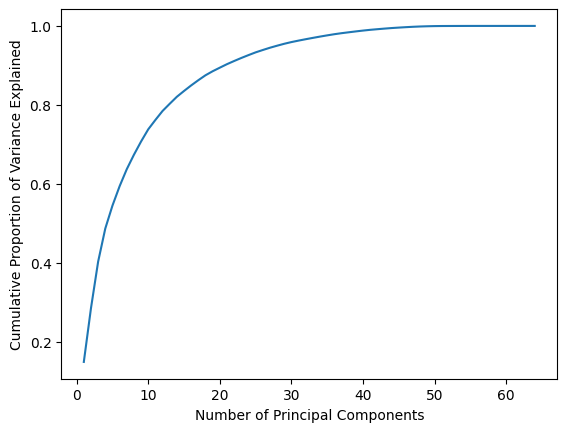

Number of Principal Components selected: 21
k = 1, Error Rate: 0.05067567567567566
k = 3, Error Rate: 0.04391891891891897
k = 5, Error Rate: 0.05067567567567566
k = 7, Error Rate: 0.057432432432432456


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# load the training and test data
train_data = df1
test_data = df2

# split the features and labels
X_train, y_train = train_data.iloc[:, :-1], train_data.iloc[:, -1]
X_test, y_test = test_data.iloc[:, :-1], test_data.iloc[:, -1]

# concatenate the training and test data
X_all = np.concatenate((X_train, X_test))

# center the data
X_centered = X_all - np.mean(X_all, axis=0)

# calculate the covariance matrix
covariance_matrix = np.cov(X_centered.T)

# calculate the eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# sort the eigenvectors according to the eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# calculate the proportion of variance explained by each principal component
total_sum = np.sum(eigenvalues)
variance_explained_ratio = eigenvalues / total_sum

# calculate the cumulative sum of eigenvalues
cumulative_variance_explained_ratio = np.cumsum(variance_explained_ratio)

# plot the proportion of variance explained by the principal components
num_principal_components = len(cumulative_variance_explained_ratio)
plt.plot(range(1, num_principal_components + 1), cumulative_variance_explained_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.show()

# select the minimum number of eigenvectors that explain at least 90% of the variance
min_variance_explained = 0.9
num_principal_components_selected = np.argmax(cumulative_variance_explained_ratio >= min_variance_explained) + 1
print('Number of Principal Components selected:', num_principal_components_selected)

# project the training data onto the first K principal components
X_train_proj = np.dot(X_train - np.mean(X_all, axis=0),
                      sorted_eigenvectors[:, :num_principal_components_selected])

# center the test data
X_test_centered = X_test - np.mean(X_all, axis=0)

# project the test data onto the first K principal components
X_test_proj = np.dot(X_test_centered, sorted_eigenvectors[:, :num_principal_components_selected])



# apply KNN to the projected data for k = {1, 3, 5, 7}
k_values = [1, 3, 5, 7]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_proj, y_train)
    y_pred = knn.predict(X_test_proj)
    error_rate = 1 - accuracy_score(y_test, y_pred)
    print(f'k = {k}, Error Rate: {error_rate}')


**Component Plotting : Projecting both the training and test data to R^2 using
only the first two principal components to plot all samples in the projected space and labeling some
data points with the corresponding digit in 10 different colors for the 10 types of digits for a good
visualization**


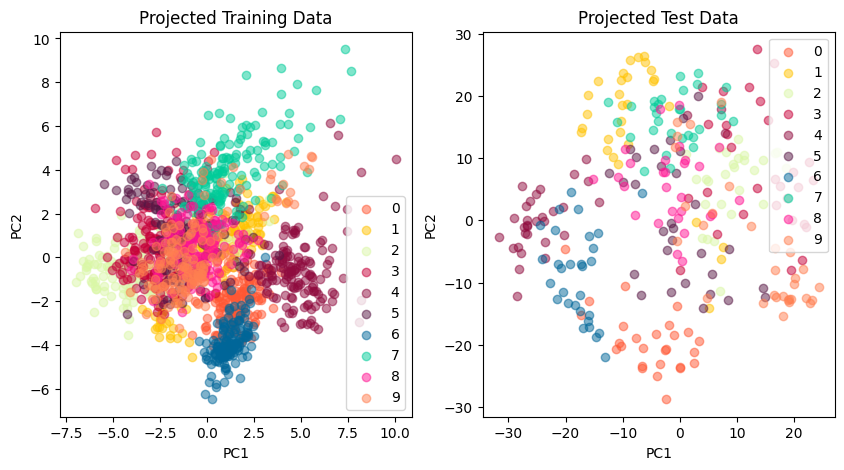

In [ ]:
import matplotlib.pyplot as plt

# a list of colors to use for plotting each digit
colors = ['#FF5733', '#FFC300', '#DAF7A6', '#C70039', '#900C3F', '#581845', '#006699', '#00CC99', '#FF1493', '#FF7F50']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the training data points in the projected space with colors corresponding to their digit label
for i in range(10):
    ax1.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], c=colors[i], label=str(i), alpha=0.5)

# Add a legend to the plot and label the axes
ax1.legend()
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_title('Projected Training Data')

# Plot the test data points in the projected space with colors corresponding to their digit label
for i in range(10):
    ax2.scatter(X_test_proj[y_test == i, 0], X_test_proj[y_test == i, 1], c=colors[i], label=str(i), alpha=0.5)

# Add a legend to the plot and label the axes
ax2.legend()
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_title('Projected Test Data')

# Show the plot
plt.show()
